<a href="https://colab.research.google.com/github/fmdsocial/pdj/blob/main/Dados_do_SIH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Banco SIH**

**Instalando as bibliotecas e pacotes necessários**

In [ ]:
# Instalando a dbfread para ler arquivos DBF
!pip install -q dbfread
# Instalando a biblioteca do Google Colab para interagir com o Google Drive

!pip install -U -q PyDrive2
# Importando as bibliotecas necessárias
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from dbfread import DBF
import pandas as pd
import os

# Autenticando e criando o cliente PyDrive2
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# ID da pasta do Google Drive onde estão meus bancos
folder_id = '*****'

# Listando todos os arquivos na pasta
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()

# Lista para armazenar os DataFrames
dataframes = []

# Baixando e carregando cada arquivo DBF
for file in file_list:
    file_id = file['id']
    file_name = file['title']

    # Baixando o arquivo
    downloaded = drive.CreateFile({'id': file_id})
    downloaded.GetContentFile(file_name)

    # Carregando o arquivo DBF no pandas
    dbf_table = DBF(file_name, encoding='latin1')
    df = pd.DataFrame(iter(dbf_table))

    # Adicionando o DataFrame à lista
    dataframes.append(df)

    # Removendo o arquivo baixado para liberar espaço
    os.remove(file_name)

# Combinando todos os DataFrames em um único DataFrame
df_combinado = pd.concat(dataframes, ignore_index=True)

# Exibindo as primeiras linhas do DataFrame combinado
print(df_combinado.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 873.2 kB/s eta 0:00:00
    UF_ZI ANO_CMPT MES_CMPT ESPEC        CGC_HOSP          N_AIH IDENT  \
0  120000     2014       01    07  04034526001468  1213100571826     1   
1  120000     2014       02    03  04034526001468  1214100073813     1   
2  120000     2014       02    03  63602940000170  1214100049085     1   
3  120000     2014       03    03  04034526001468  1214100127097     1   
4  120000     2014       03    03  04521308000133  1214100118209     1   

        CEP MUNIC_RES      NASC  ... DIAGSEC9  TPDISEC1  TPDISEC2  TPDISEC3  \
0  69940000    120050  19990511  ...                                          
1  69940000    120050  19431020  ...                                          
2  69900970    120040  19991223  ...                                          
3  69940000    120050  19571001  ...                                          
4  69970000    120060  19620108  ...                                          



In [ ]:
# Frequência causa básica
# Ajustar a configuração para exibir todas as linhas
pd.set_option('display.max_rows', None)

frequencia_causabas = df_combinado['ANO_CMPT'].value_counts()
print(frequencia_causabas)

ANO_CMPT
2019    5159
2018    4794
2016    4750
2017    4396
2010    4341
2008    4191
2009    4148
2015    3970
2011    3874
2013    3804
2012    3782
2014    3604
2022    3535
2020    3502
2021    3278
Name: count, dtype: int64


In [ ]:
df_combinado.head(10)

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,120000,2014,01,07,04034526001468,1213100571826,1,69940000,120050,19990511,...,,,,,,,,,,
1,120000,2014,02,03,04034526001468,1214100073813,1,69940000,120050,19431020,...,,,,,,,,,,
2,120000,2014,02,03,63602940000170,1214100049085,1,69900970,120040,19991223,...,,,,,,,,,,
3,120000,2014,03,03,04034526001468,1214100127097,1,69940000,120050,19571001,...,,,,,,,,,,
4,120000,2014,03,03,04521308000133,1214100118209,1,69970000,120060,19620108,...,,,,,,,,,,
5,120000,2014,03,07,04034526001115,1214100152155,1,69925000,120045,19370706,...,,,,,,,,,,
6,120000,2014,03,07,04521308000133,1214100118297,1,69970000,120060,20130322,...,,,,,,,,,,
7,120000,2014,04,07,04034526001115,1214100209290,1,69925000,120045,20120618,...,,,,,,,,,,
8,120000,2014,04,07,04034526001115,1214100209575,1,69925000,120045,20100212,...,,,,,,,,,,
9,120000,2014,04,07,04034526000496,1214100046687,1,69900970,120040,20110620,...,,,,,,,,,,


In [ ]:
# Alterar a configuração para mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Exibir o resumo do DataFrame
print(df_combinado.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61128 entries, 0 to 61127
Columns: 113 entries, UF_ZI to TPDISEC9
dtypes: float64(19), int64(17), object(77)
memory usage: 52.7+ MB
None


In [ ]:
# Exibir todos os nomes das colunas
print(df_combinado.columns.tolist())

['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'CGC_HOSP', 'N_AIH', 'IDENT', 'CEP', 'MUNIC_RES', 'NASC', 'SEXO', 'UTI_MES_IN', 'UTI_MES_AN', 'UTI_MES_AL', 'UTI_MES_TO', 'MARCA_UTI', 'UTI_INT_IN', 'UTI_INT_AN', 'UTI_INT_AL', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS', 'PROC_SOLIC', 'PROC_REA', 'VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN', 'VAL_ACOMP', 'VAL_ORTP', 'VAL_SANGUE', 'VAL_SADTSR', 'VAL_TRANSP', 'VAL_OBSANG', 'VAL_PED1AC', 'VAL_TOT', 'VAL_UTI', 'US_TOT', 'DT_INTER', 'DT_SAIDA', 'DIAG_PRINC', 'DIAG_SECUN', 'COBRANCA', 'NATUREZA', 'NAT_JUR', 'GESTAO', 'RUBRICA', 'IND_VDRL', 'MUNIC_MOV', 'COD_IDADE', 'IDADE', 'DIAS_PERM', 'MORTE', 'NACIONAL', 'NUM_PROC', 'CAR_INT', 'TOT_PT_SP', 'CPF_AUT', 'HOMONIMO', 'NUM_FILHOS', 'INSTRU', 'CID_NOTIF', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO', 'INSC_PN', 'SEQ_AIH5', 'CBOR', 'CNAER', 'VINCPREV', 'GESTOR_COD', 'GESTOR_TP', 'GESTOR_CPF', 'GESTOR_DT', 'CNES', 'CNPJ_MANT', 'INFEHOSP', 'CID_ASSO', 'CID_MORTE', 'COMPLEX', 'FINANC', 'FAEC_TP', 'REGCT', 'RACA_COR', '

In [ ]:
# Iterar sobre as colunas e exibir o nome da coluna e seu tipo de dado
for col in df_combinado.columns:
    print(f"Column: {col}, Type: {df_combinado[col].dtype}")

Column: UF_ZI, Type: object
Column: ANO_CMPT, Type: object
Column: MES_CMPT, Type: object
Column: ESPEC, Type: object
Column: CGC_HOSP, Type: object
Column: N_AIH, Type: object
Column: IDENT, Type: object
Column: CEP, Type: object
Column: MUNIC_RES, Type: object
Column: NASC, Type: object
Column: SEXO, Type: object
Column: UTI_MES_IN, Type: int64
Column: UTI_MES_AN, Type: int64
Column: UTI_MES_AL, Type: int64
Column: UTI_MES_TO, Type: int64
Column: MARCA_UTI, Type: object
Column: UTI_INT_IN, Type: int64
Column: UTI_INT_AN, Type: int64
Column: UTI_INT_AL, Type: int64
Column: UTI_INT_TO, Type: int64
Column: DIAR_ACOM, Type: int64
Column: QT_DIARIAS, Type: int64
Column: PROC_SOLIC, Type: object
Column: PROC_REA, Type: object
Column: VAL_SH, Type: float64
Column: VAL_SP, Type: float64
Column: VAL_SADT, Type: float64
Column: VAL_RN, Type: float64
Column: VAL_ACOMP, Type: float64
Column: VAL_ORTP, Type: float64
Column: VAL_SANGUE, Type: float64
Column: VAL_SADTSR, Type: float64
Column: VAL_T

**Filtrando o banco para as variáveis que quero manter**

In [ ]:
# Criando um novo banco com as variáveis que precisamos
bancosih = df_combinado[['DIAG_PRINC', 'PROC_REA', 'DIAS_PERM', 'VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN', 'VAL_ACOMP', 'VAL_ORTP', 'VAL_SANGUE', 'VAL_SADTSR', 'VAL_TRANSP', 'VAL_OBSANG', 'VAL_PED1AC', 'VAL_TOT', 'VAL_UTI', 'NASC', 'IDADE', 'SEXO', 'MUNIC_RES', 'ANO_CMPT', 'DT_INTER', 'DT_SAIDA']]

In [ ]:
bancosih.head(10)

,DIAG_PRINC,PROC_REA,DIAS_PERM,VAL_SH,VAL_SP,VAL_SADT,VAL_RN,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_TOT,VAL_UTI,NASC,IDADE,SEXO,MUNIC_RES,ANO_CMPT,DT_INTER,DT_SAIDA
0,M609,0303090316,15,358.03,52.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,411.00,0.0,19990511,14,1,120050,2014,20131022,20131106
1,M609,0303090316,12,285.46,41.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326.82,0.0,19431020,70,3,120050,2014,20140209,20140221
2,M608,0303090316,12,173.08,33.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.70,0.0,19991223,14,1,120040,2014,20140119,20140131
3,M609,0303090316,2,157.08,33.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.70,0.0,19571001,56,1,120050,2014,20140308,20140310
4,M600,0308040015,2,170.12,29.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.33,0.0,19620108,51,3,120060,2014,20140101,20140103
5,M609,0303090316,2,157.08,33.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.70,0.0,19370706,76,3,120045,2014,20140226,20140228
6,M600,0308040015,3,194.12,29.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223.33,0.0,20130322,9,1,120060,2014,20140114,20140117
7,M609,0303090316,4,189.08,33.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.70,0.0,20120618,1,1,120045,2014,20140402,20140406
8,M609,0303090316,3,181.08,33.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.70,0.0,20100212,3,1,120045,2014,20140110,20140113
9,M608,0303090316,19,492.15,68.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,560.60,0.0,20110620,2,3,120040,2014,20140207,20140226


In [ ]:
freq_absoluta = bancosih['SEXO'].value_counts()
print(freq_absoluta)


SEXO
1    37212
3    23916
Name: count, dtype: int64


In [ ]:
freq_relativa = bancosih['SEXO'].value_counts(normalize=True) * 100
print(freq_relativa)

SEXO
1    60.87554
3    39.12446
Name: proportion, dtype: float64


**Tratando as variáveis**

***ANO***

In [ ]:
# Criar uma nova para ano
bancosih['ano'] = bancosih['ANO_CMPT']

<ipython-input-11-ceb252a77ce0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bancosih['ano'] = bancosih['ANO_CMPT']


**SEXO**

In [ ]:
# Criar uma nova variável 'sexo_rótulo' baseada na variável original 'sexo'
bancosih['sexon'] = bancosih['SEXO']

<ipython-input-12-317fb52a2e15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bancosih['sexon'] = bancosih['SEXO']


In [ ]:
# Renomear mulheres (representadas pelo número 3) para 1 na variável 'sexon'
bancosih['sexon'] = pd.to_numeric(bancosih['sexon'])

<ipython-input-13-06a848bab5ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bancosih['sexon'] = pd.to_numeric(bancosih['sexon'])


In [ ]:
bancosih.loc[bancosih['sexon'] == 3, 'sexon'] = 2

In [ ]:
# Atribuir rótulos: 1 = feminino e 2 = masculino na variável 'sexon'
bancosih.loc[bancosih['sexon'] == 2, 'sexon'] = 'feminino'
bancosih.loc[bancosih['sexon'] == 1, 'sexon'] = 'masculino'

<ipython-input-15-37790c525475>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'feminino' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  bancosih.loc[bancosih['sexon'] == 2, 'sexon'] = 'feminino'


In [ ]:
# Mostrar o DataFrame atualizado
print(bancosih.head(10))

  DIAG_PRINC    PROC_REA  DIAS_PERM  VAL_SH  VAL_SP  VAL_SADT  VAL_RN  \
0       M609  0303090316         15  358.03   52.97       0.0     0.0   
1       M609  0303090316         12  285.46   41.36       0.0     0.0   
2       M608  0303090316         12  173.08   33.62       0.0     0.0   
3       M609  0303090316          2  157.08   33.62       0.0     0.0   
4       M600  0308040015          2  170.12   29.21       0.0     0.0   
5       M609  0303090316          2  157.08   33.62       0.0     0.0   
6       M600  0308040015          3  194.12   29.21       0.0     0.0   
7       M609  0303090316          4  189.08   33.62       0.0     0.0   
8       M609  0303090316          3  181.08   33.62       0.0     0.0   
9       M608  0303090316         19  492.15   68.45       0.0     0.0   

   VAL_ACOMP  VAL_ORTP  VAL_SANGUE  VAL_SADTSR  VAL_TRANSP  VAL_OBSANG  \
0        0.0       0.0         0.0         0.0         0.0         0.0   
1        0.0       0.0         0.0         0.0  

In [ ]:
freq_absoluta = bancosih['sexon'].value_counts()
print(freq_absoluta)

sexon
masculino    37212
feminino     23916
Name: count, dtype: int64


In [ ]:
freq_relativa = bancosih['sexon'].value_counts(normalize=True) * 100
print(freq_relativa)

sexon
masculino    60.87554
feminino     39.12446
Name: proportion, dtype: float64


***IDADE***

In [ ]:
# Converter as colunas NASC e DT_INTER para o formato de data
bancosih['NASC'] = pd.to_datetime(bancosih['NASC'], format='%Y%m%d', errors='coerce')
bancosih['DT_INTER'] = pd.to_datetime(bancosih['DT_INTER'], format='%Y%m%d', errors='coerce')

# Verificar se a conversão foi bem-sucedida
print(bancosih[['NASC', 'DT_INTER']].head())
print(bancosih[['NASC', 'DT_INTER']].dtypes)

# Certificar-se de que não há valores nulos após a conversão
print(bancosih[['NASC', 'DT_INTER']].isnull().sum())

# Calcular a idade no momento da internação em anos, convertendo para inteiro
bancosih.loc[:, 'idaden'] = ((bancosih['DT_INTER'].dt.year - bancosih['NASC'].dt.year) -
                             ((bancosih['DT_INTER'].dt.month < bancosih['NASC'].dt.month) |
                              ((bancosih['DT_INTER'].dt.month == bancosih['NASC'].dt.month) &
                               (bancosih['DT_INTER'].dt.day < bancosih['NASC'].dt.day)))).astype(int)

# Exibir as primeiras linhas do DataFrame para verificar o cálculo
print(bancosih[['NASC', 'DT_INTER', 'idaden']].head())

        NASC   DT_INTER
0 1999-05-11 2013-10-22
1 1943-10-20 2014-02-09
2 1999-12-23 2014-01-19
3 1957-10-01 2014-03-08
4 1962-01-08 2014-01-01
NASC        datetime64[ns]
DT_INTER    datetime64[ns]
dtype: object
NASC        0
DT_INTER    0
dtype: int64
        NASC   DT_INTER  idaden
0 1999-05-11 2013-10-22      14
1 1943-10-20 2014-02-09      70
2 1999-12-23 2014-01-19      14
3 1957-10-01 2014-03-08      56
4 1962-01-08 2014-01-01      51


<ipython-input-19-414e8b46e8b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bancosih['NASC'] = pd.to_datetime(bancosih['NASC'], format='%Y%m%d', errors='coerce')
<ipython-input-19-414e8b46e8b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bancosih['DT_INTER'] = pd.to_datetime(bancosih['DT_INTER'], format='%Y%m%d', errors='coerce')
<ipython-input-19-414e8b46e8b8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [ ]:
print(bancosih.head(10))

  DIAG_PRINC    PROC_REA  DIAS_PERM  VAL_SH  VAL_SP  VAL_SADT  VAL_RN  \
0       M609  0303090316         15  358.03   52.97       0.0     0.0   
1       M609  0303090316         12  285.46   41.36       0.0     0.0   
2       M608  0303090316         12  173.08   33.62       0.0     0.0   
3       M609  0303090316          2  157.08   33.62       0.0     0.0   
4       M600  0308040015          2  170.12   29.21       0.0     0.0   
5       M609  0303090316          2  157.08   33.62       0.0     0.0   
6       M600  0308040015          3  194.12   29.21       0.0     0.0   
7       M609  0303090316          4  189.08   33.62       0.0     0.0   
8       M609  0303090316          3  181.08   33.62       0.0     0.0   
9       M608  0303090316         19  492.15   68.45       0.0     0.0   

   VAL_ACOMP  VAL_ORTP  VAL_SANGUE  VAL_SADTSR  VAL_TRANSP  VAL_OBSANG  \
0        0.0       0.0         0.0         0.0         0.0         0.0   
1        0.0       0.0         0.0         0.0  

***UF***

In [ ]:
# Extrair os dois primeiros dígitos da coluna MUNIC_RES para criar a coluna UF
bancosih['uf'] = bancosih['MUNIC_RES'].astype(str).str[:2]

# Exibir as primeiras linhas para verificar
print(bancosih[['MUNIC_RES', 'uf']].head())

  MUNIC_RES  uf
0    120050  12
1    120050  12
2    120040  12
3    120050  12
4    120060  12


<ipython-input-21-e6444fb9fb8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bancosih['uf'] = bancosih['MUNIC_RES'].astype(str).str[:2]


In [ ]:
# Dicionário de mapeamento dos códigos para os nomes das UFs
uf_mapping = {
    '11': 'Rondônia',
    '12': 'Acre',
    '13': 'Amazonas',
    '14': 'Roraima',
    '15': 'Pará',
    '16': 'Amapá',
    '17': 'Tocantins',
    '21': 'Maranhão',
    '22': 'Piauí',
    '23': 'Ceará',
    '24': 'Rio Grande do Norte',
    '25': 'Paraíba',
    '26': 'Pernambuco',
    '27': 'Alagoas',
    '28': 'Sergipe',
    '29': 'Bahia',
    '31': 'Minas Gerais',
    '32': 'Espírito Santo',
    '33': 'Rio de Janeiro',
    '35': 'São Paulo',
    '41': 'Paraná',
    '42': 'Santa Catarina',
    '43': 'Rio Grande do Sul',
    '50': 'Mato Grosso do Sul',
    '51': 'Mato Grosso',
    '52': 'Goiás',
    '53': 'Distrito Federal'
}

# Mapear os códigos de UF para os nomes
bancosih['ufnome'] = bancosih['uf'].map(uf_mapping)

# Exibir as primeiras linhas para verificar
print(bancosih[['MUNIC_RES', 'uf', 'ufnome']].head())


  MUNIC_RES  uf ufnome
0    120050  12   Acre
1    120050  12   Acre
2    120040  12   Acre
3    120050  12   Acre
4    120060  12   Acre


<ipython-input-22-168d435685cb>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bancosih['ufnome'] = bancosih['uf'].map(uf_mapping)


In [ ]:
bancosih.head(10)

,DIAG_PRINC,PROC_REA,DIAS_PERM,VAL_SH,VAL_SP,VAL_SADT,VAL_RN,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_TOT,VAL_UTI,NASC,IDADE,SEXO,MUNIC_RES,ANO_CMPT,DT_INTER,DT_SAIDA,ano,sexon,idaden,uf,ufnome
0,M609,0303090316,15,358.03,52.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,411.00,0.0,1999-05-11,14,1,120050,2014,2013-10-22,20131106,2014,masculino,14,12,Acre
1,M609,0303090316,12,285.46,41.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326.82,0.0,1943-10-20,70,3,120050,2014,2014-02-09,20140221,2014,feminino,70,12,Acre
2,M608,0303090316,12,173.08,33.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.70,0.0,1999-12-23,14,1,120040,2014,2014-01-19,20140131,2014,masculino,14,12,Acre
3,M609,0303090316,2,157.08,33.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.70,0.0,1957-10-01,56,1,120050,2014,2014-03-08,20140310,2014,masculino,56,12,Acre
4,M600,0308040015,2,170.12,29.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.33,0.0,1962-01-08,51,3,120060,2014,2014-01-01,20140103,2014,feminino,51,12,Acre
5,M609,0303090316,2,157.08,33.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.70,0.0,1937-07-06,76,3,120045,2014,2014-02-26,20140228,2014,feminino,76,12,Acre
6,M600,0308040015,3,194.12,29.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223.33,0.0,2013-03-22,9,1,120060,2014,2014-01-14,20140117,2014,masculino,0,12,Acre
7,M609,0303090316,4,189.08,33.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.70,0.0,2012-06-18,1,1,120045,2014,2014-04-02,20140406,2014,masculino,1,12,Acre
8,M609,0303090316,3,181.08,33.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.70,0.0,2010-02-12,3,1,120045,2014,2014-01-10,20140113,2014,masculino,3,12,Acre
9,M608,0303090316,19,492.15,68.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,560.60,0.0,2011-06-20,2,3,120040,2014,2014-02-07,20140226,2014,feminino,2,12,Acre


**Análises**

**Ocorrência por ano**

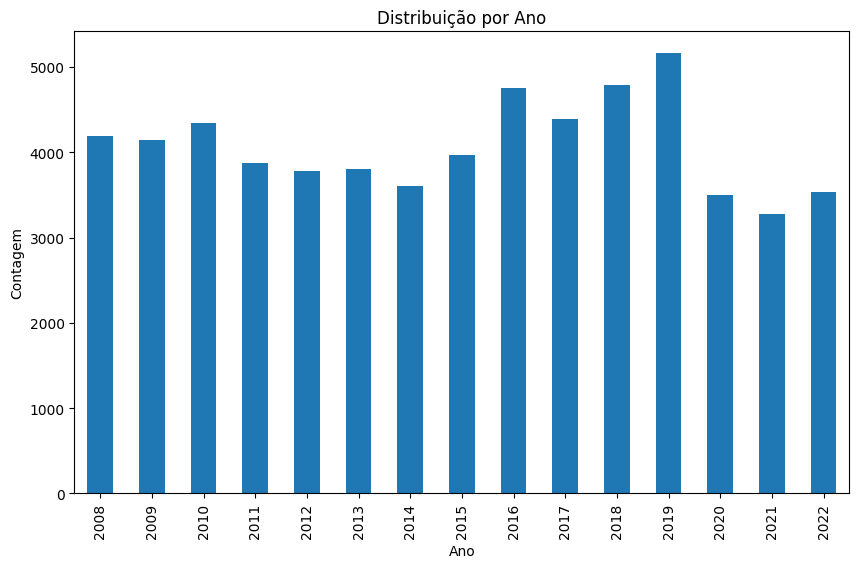

In [ ]:
import matplotlib.pyplot as plt
# Ano
plt.figure(figsize=(10, 6))
bancosih['ano'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.show()

<Figure size 1200x800 with 0 Axes>

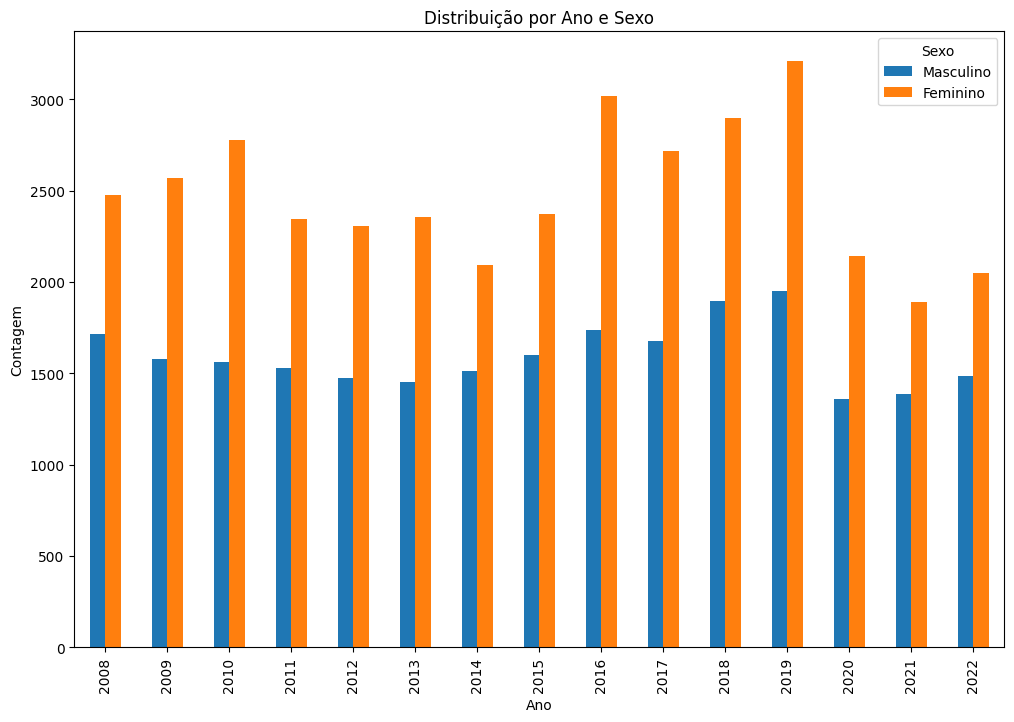

In [ ]:
# Distribuição por sexo
# Ajustar o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar uma tabela de contingência (crosstab) para contar as ocorrências de 'ano' e 'sexon'
contagem_ano_sexo = pd.crosstab(bancosih['ano'], bancosih['sexon'])

# Plotar o gráfico de barras agrupadas (laterais)
contagem_ano_sexo.plot(kind='bar', figsize=(12, 8))

# Adicionar título e rótulos
plt.title('Distribuição por Ano e Sexo')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.legend(title='Sexo', labels=['Masculino', 'Feminino'])

# Exibir o gráfico
plt.show()

<ipython-input-29-240fe9fab049>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bancosih['faixa_etaria'] = pd.cut(bancosih['idaden'], bins=[0, 18, 59, float('inf')], labels=['0-18', '19-59', '60+'])


<Figure size 1200x800 with 0 Axes>

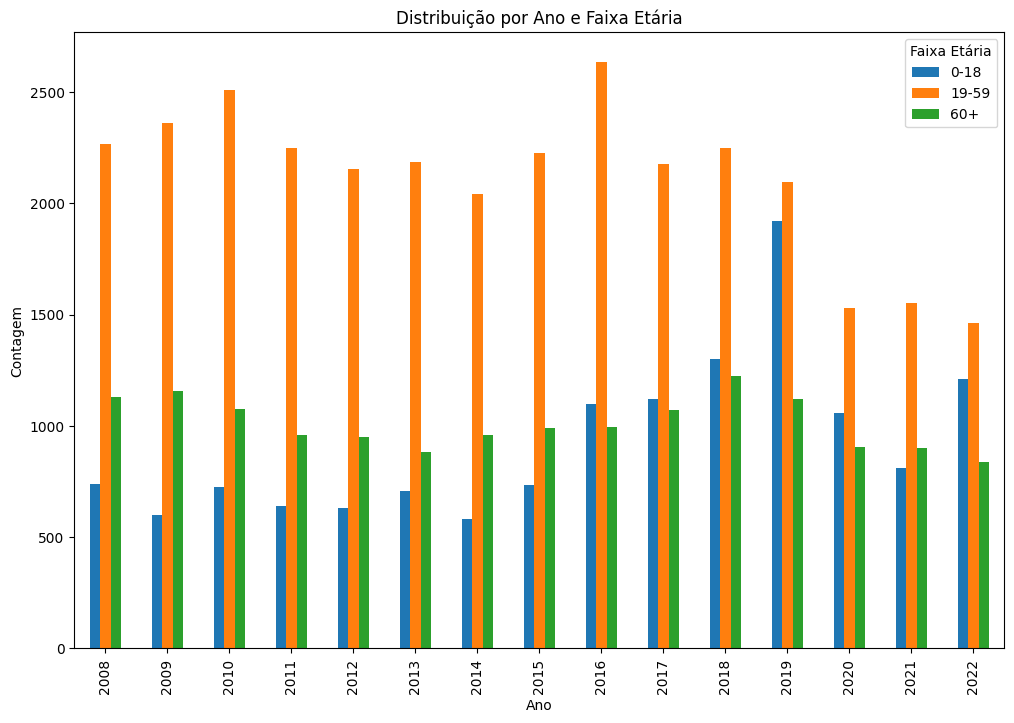

In [ ]:
# Distribuição por faixa etária
# Categorizar a variável 'idaden' em faixas etárias
bancosih['faixa_etaria'] = pd.cut(bancosih['idaden'], bins=[0, 18, 59, float('inf')], labels=['0-18', '19-59', '60+'])

# Criar uma tabela de contingência (crosstab) para contar as ocorrências de 'ano' e 'faixa_etaria'
contagem_ano_faixa = pd.crosstab(bancosih['ano'], bancosih['faixa_etaria'])

# Plotar o gráfico de barras agrupadas (laterais)
plt.figure(figsize=(12, 8))
contagem_ano_faixa.plot(kind='bar', figsize=(12, 8))

# Adicionar título e rótulos
plt.title('Distribuição por Ano e Faixa Etária')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.legend(title='Faixa Etária')

# Exibir o gráfico
plt.show()

<ipython-input-32-d7aafee6591a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bancosih['regiao'] = bancosih['ufnome'].map(mapa_regioes)


<Figure size 1400x800 with 0 Axes>

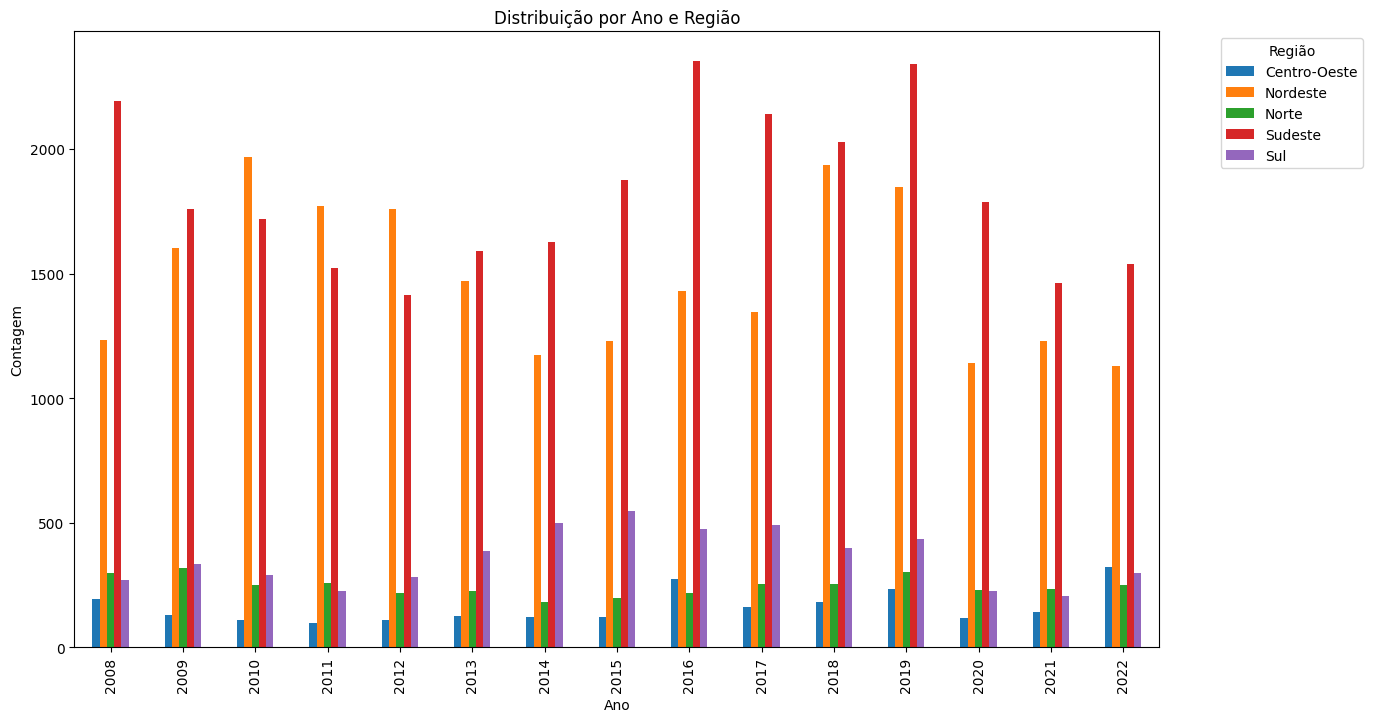

In [ ]:
# Distribuição pro região
# Dicionário para mapear os estados às suas respectivas regiões
mapa_regioes = {
    'Acre': 'Norte', 'Amapá': 'Norte', 'Amazonas': 'Norte', 'Pará': 'Norte', 'Rondônia': 'Norte', 'Roraima': 'Norte', 'Tocantins': 'Norte',
    'Alagoas': 'Nordeste', 'Bahia': 'Nordeste', 'Ceará': 'Nordeste', 'Maranhão': 'Nordeste', 'Paraíba': 'Nordeste', 'Pernambuco': 'Nordeste',
    'Piauí': 'Nordeste', 'Rio Grande do Norte': 'Nordeste', 'Sergipe': 'Nordeste',
    'Distrito Federal': 'Centro-Oeste', 'Goiás': 'Centro-Oeste', 'Mato Grosso': 'Centro-Oeste', 'Mato Grosso do Sul': 'Centro-Oeste',
    'Espírito Santo': 'Sudeste', 'Minas Gerais': 'Sudeste', 'Rio de Janeiro': 'Sudeste', 'São Paulo': 'Sudeste',
    'Paraná': 'Sul', 'Rio Grande do Sul': 'Sul', 'Santa Catarina': 'Sul'
}

# Criar a nova coluna 'regiao' mapeando 'ufnome' com as regiões
bancosih['regiao'] = bancosih['ufnome'].map(mapa_regioes)

# Criar uma tabela de contingência (crosstab) para contar as ocorrências de 'ano' e 'regiao'
contagem_ano_regiao = pd.crosstab(bancosih['ano'], bancosih['regiao'])

# Plotar o gráfico de barras agrupadas (laterais)
plt.figure(figsize=(14, 8))
contagem_ano_regiao.plot(kind='bar', figsize=(14, 8))

# Adicionar título e rótulos
plt.title('Distribuição por Ano e Região')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar a legenda fora do gráfico

# Exibir o gráfico
plt.show()

<Figure size 1400x800 with 0 Axes>

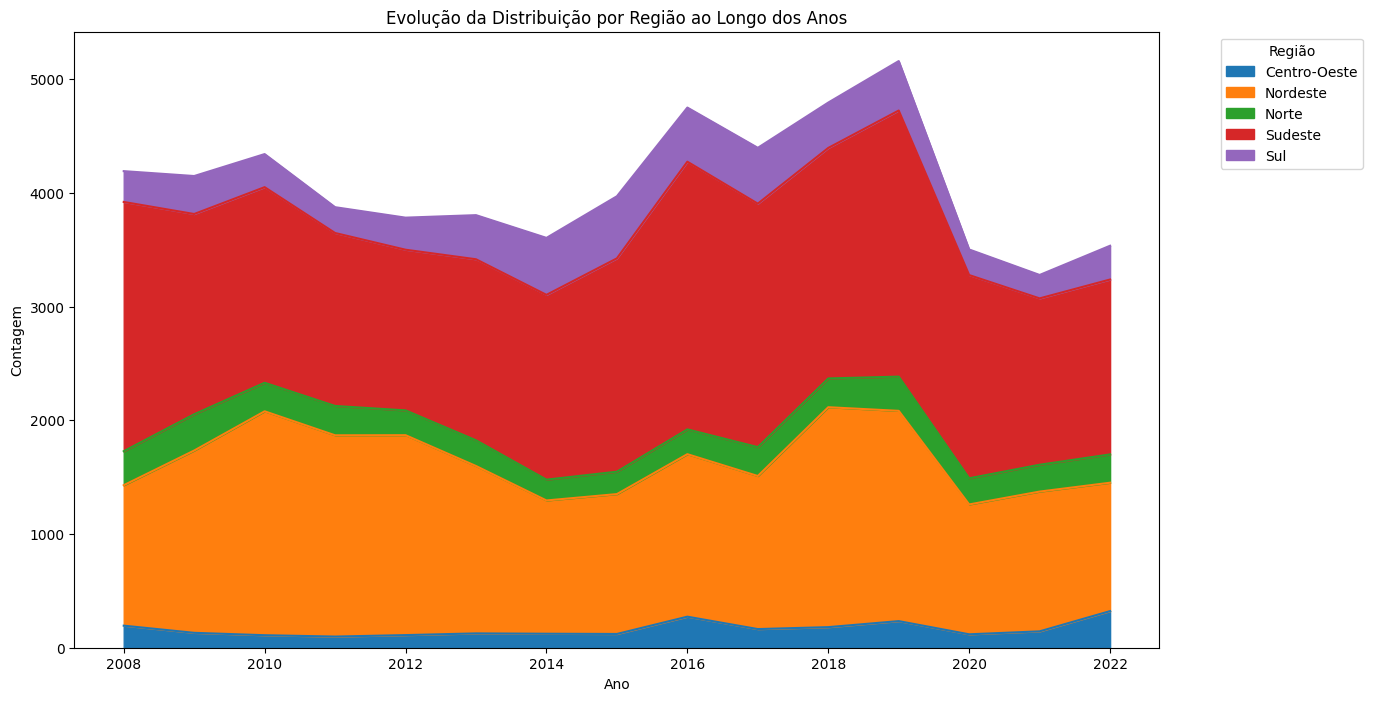

In [ ]:
# Plotar o gráfico de linha empilhada
plt.figure(figsize=(14, 8))
contagem_ano_regiao.plot(kind='area', stacked=True, figsize=(14, 8))

# Adicionar título e rótulos
plt.title('Evolução da Distribuição por Região ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.show()

<Figure size 1400x800 with 0 Axes>

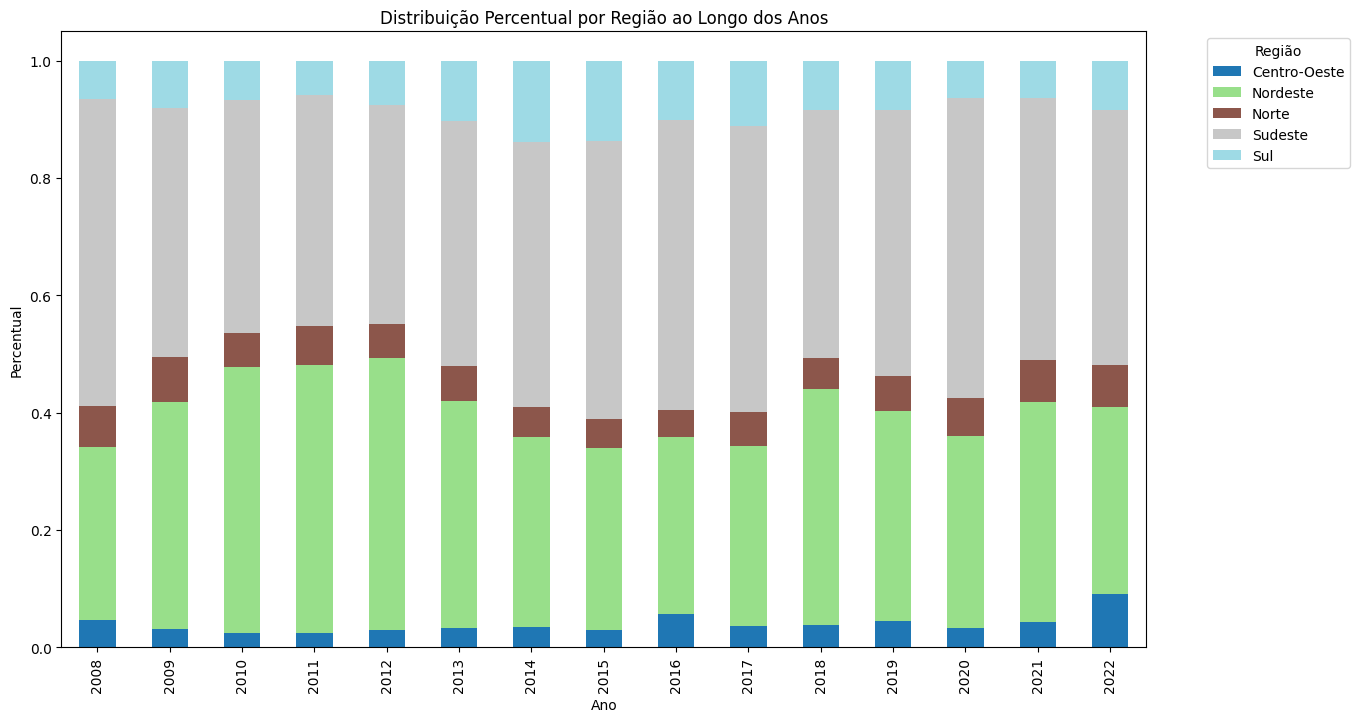

In [ ]:
# Normalizar para mostrar em percentual
contagem_ano_regiao_percentual = contagem_ano_regiao.div(contagem_ano_regiao.sum(axis=1), axis=0)

# Plotar o gráfico de barras empilhadas normalizado
plt.figure(figsize=(14, 8))
contagem_ano_regiao_percentual.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Adicionar título e rótulos
plt.title('Distribuição Percentual por Região ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Percentual')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.show()

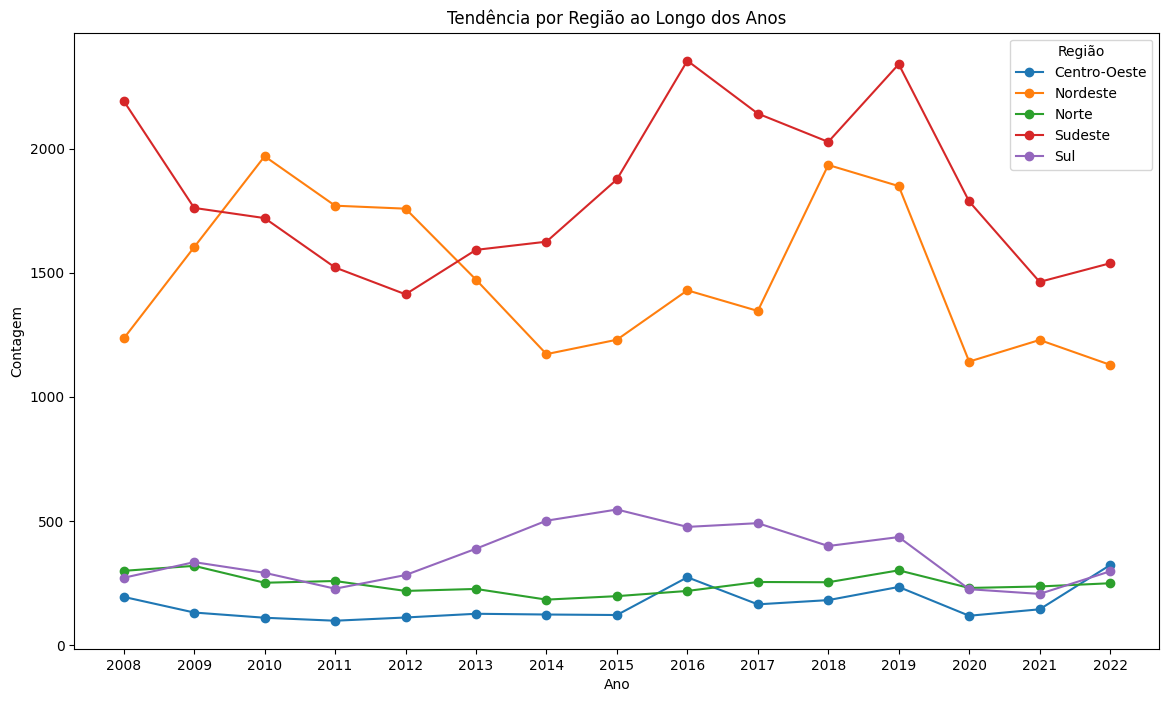

In [ ]:
plt.figure(figsize=(14, 8))
for regiao in contagem_ano_regiao.columns:
    plt.plot(contagem_ano_regiao.index, contagem_ano_regiao[regiao], marker='o', label=regiao)

# Adicionar título e rótulos
plt.title('Tendência por Região ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.legend(title='Região')

# Exibir o gráfico
plt.show()

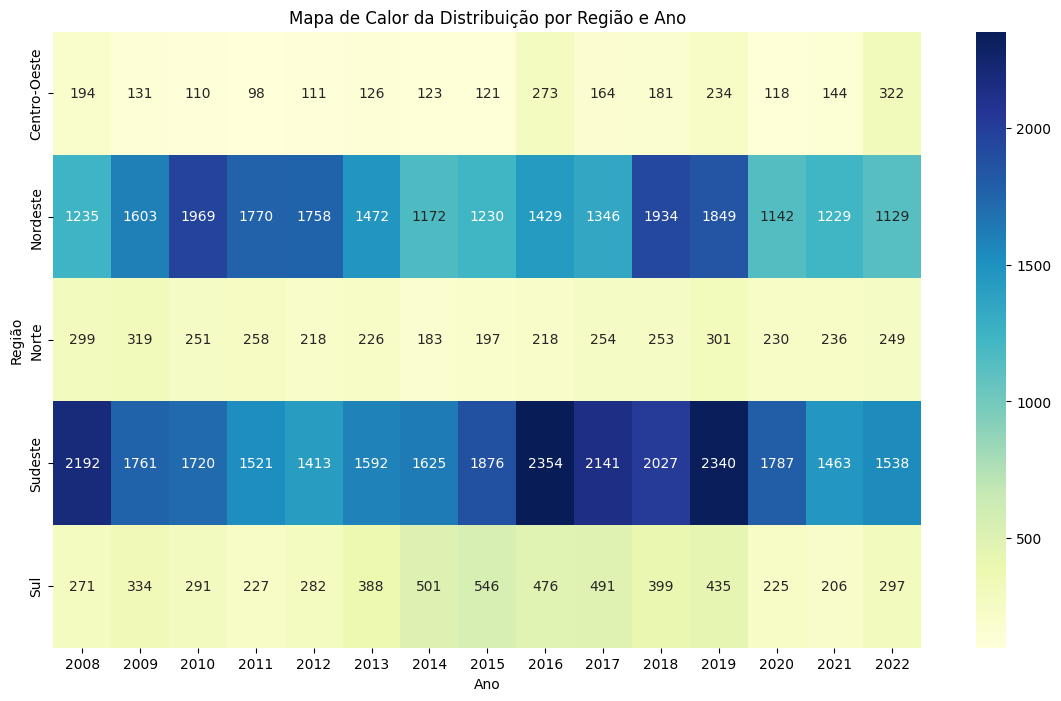

In [ ]:
#Mapa de calor
import seaborn as sns

# Plotar o heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(contagem_ano_regiao.T, cmap='YlGnBu', annot=True, fmt='d')

# Adicionar título e rótulos
plt.title('Mapa de Calor da Distribuição por Região e Ano')
plt.xlabel('Ano')
plt.ylabel('Região')

# Exibir o gráfico
plt.show()

**Série temporal**

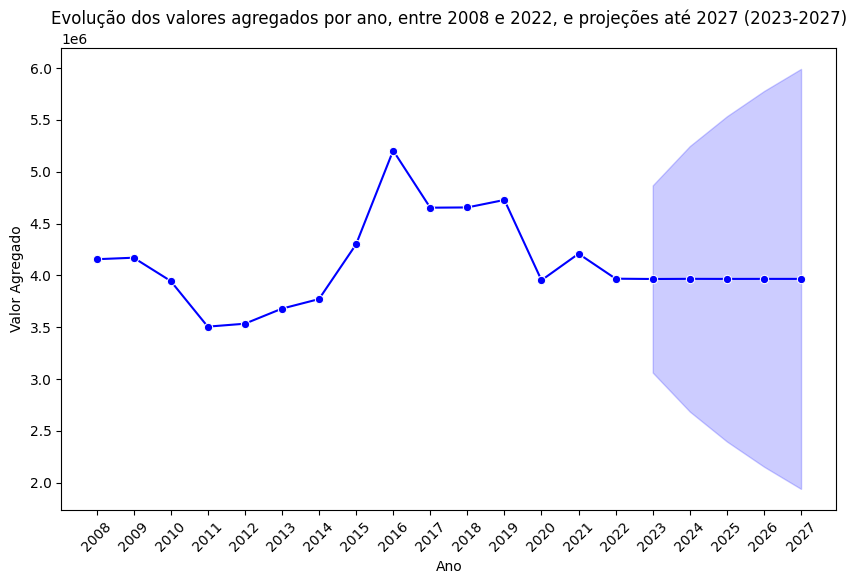

2023-01-01    3.965160e+06
2024-01-01    3.966546e+06
2025-01-01    3.965884e+06
2026-01-01    3.966200e+06
2027-01-01    3.966049e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
# Fazendo uma previsão apra os próximos 5 anos, 2023 a 2027

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Garantir que estamos trabalhando com uma cópia dos dados para evitar warnings
bancosih = bancosih.copy()

# Criar uma nova coluna 'ano_extracao' que contém apenas os anos extraídos de 'ANO_CMPT'
bancosih['ano_extracao'] = pd.to_datetime(bancosih['ANO_CMPT'], errors='coerce').dt.year

# Substitua 'VAL_TOT' pela coluna correta de interesse
coluna_casos = 'VAL_TOT'

# Somar ou agregar os dados por ano usando a nova coluna 'ano_extracao'
dados_anuais = bancosih.groupby('ano_extracao')[coluna_casos].sum()

# Garantir que os dados estão no formato numérico correto
dados_anuais = pd.to_numeric(dados_anuais, errors='coerce')

# Agora, vamos criar a série temporal usando a variável 'ano_extracao'
dados_ts = pd.Series(dados_anuais.values.flatten(), index=pd.date_range(start=str(dados_anuais.index.min()), periods=len(dados_anuais), freq='YS'))

# Certificar-se de que a série temporal é numérica
dados_ts = pd.to_numeric(dados_ts, errors='coerce')

# Aplicando modelo ARIMA
modelo_arima = ARIMA(dados_ts, order=(1,1,1)).fit()

# Fazendo previsão para os próximos 5 anos (2023-2027)
previsoes = modelo_arima.get_forecast(steps=5)
previsao_media = previsoes.predicted_mean
intervalo_confianca = previsoes.conf_int()

# Criando um DataFrame com os dados das previsões e intervalos de confiança
anos_futuros = range(2023, 2028)  # Atualizando o intervalo para 2023-2027
dados_futuros = pd.DataFrame({
    'Ano': list(dados_anuais.index) + list(anos_futuros),
    'Previsao': dados_anuais.values.flatten().tolist() + previsao_media.tolist(),
    'Lower': [np.nan]*len(dados_anuais) + intervalo_confianca.iloc[:, 0].tolist(),
    'Upper': [np.nan]*len(dados_anuais) + intervalo_confianca.iloc[:, 1].tolist()
})

# Plotando com Matplotlib e Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_futuros, x='Ano', y='Previsao', marker='o', color='blue')
plt.fill_between(dados_futuros['Ano'], dados_futuros['Lower'], dados_futuros['Upper'], color='blue', alpha=0.2)
plt.title('Evolução dos valores agregados por ano, entre 2008 e 2022, e projeções até 2027 (2023-2027)')
plt.xlabel('Ano')
plt.ylabel('Valor Agregado')
plt.xticks(dados_futuros['Ano'], rotation=45)
plt.show()

# Acessando os valores previstos para os anos de 2023 a 2027
print(previsao_media)

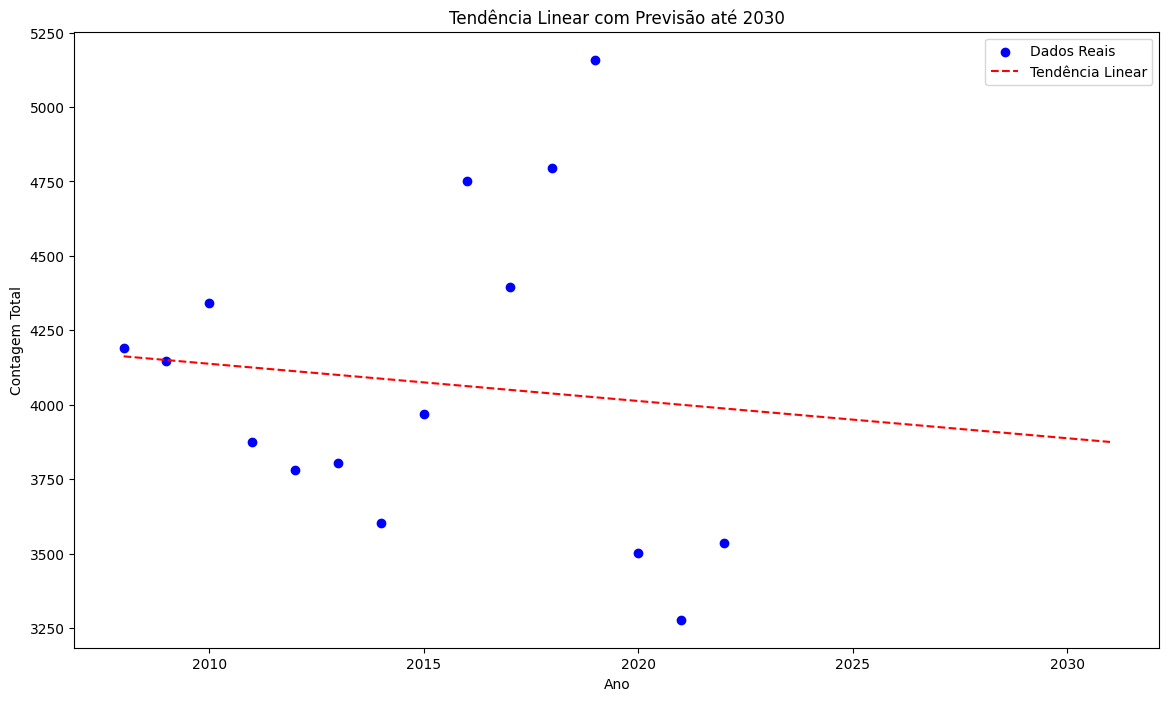

In [ ]:
# Converter o índice (anos) para um array numérico
anos_reais = serie_temporal_total.index.astype(int)

# Ajustar uma linha de regressão linear
coefs = np.polyfit(anos_reais, serie_temporal_total.values, 1)
tendencia = np.polyval(coefs, np.append(anos_reais, anos_futuros))

# Plotar o gráfico de dispersão com linha de regressão
plt.figure(figsize=(14, 8))
plt.scatter(anos_reais, serie_temporal_total, label='Dados Reais', color='blue')
plt.plot(np.append(anos_reais, anos_futuros), tendencia, label='Tendência Linear', color='red', linestyle='--')

# Adicionar título e rótulos
plt.title('Tendência Linear com Previsão até 2030')
plt.xlabel('Ano')
plt.ylabel('Contagem Total')
plt.legend()

# Exibir o gráfico
plt.show()

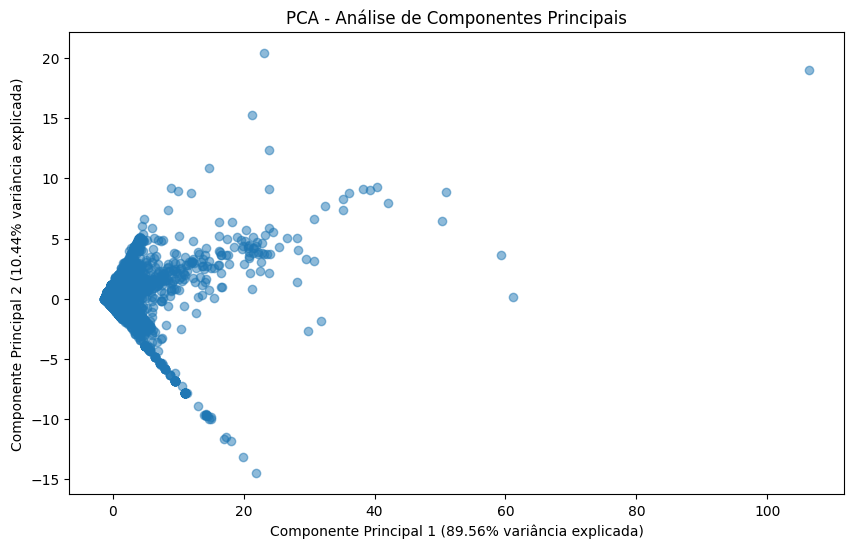

In [ ]:
# Análise de PCA para identificar combinações linerares capturando a variância nos dados
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Selecionar variáveis numéricas para PCA
variaveis_pca = bancosih[['VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN', 'VAL_ACOMP', 'VAL_TOT']]

# Escalar os dados
scaler = StandardScaler()
variaveis_pca_scaled = scaler.fit_transform(variaveis_pca)

# Aplicar PCA
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais
componentes_principais = pca.fit_transform(variaveis_pca_scaled)

# Variância explicada por cada componente principal
variancia_explicada = pca.explained_variance_ratio_

# Criar DataFrame para visualização
pca_df = pd.DataFrame(data=componentes_principais, columns=['PC1', 'PC2'])

# Visualizar os componentes principais
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel(f'Componente Principal 1 ({variancia_explicada[0]*100:.2f}% variância explicada)')
plt.ylabel(f'Componente Principal 2 ({variancia_explicada[1]*100:.2f}% variância explicada)')
plt.title('PCA - Análise de Componentes Principais')
plt.show()


In [ ]:
# Acessar as cargas dos componentes principais
cargas_pca = pd.DataFrame(pca.components_, columns=variaveis_pca.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])

# Exibir as cargas dos componentes principais
print(cargas_pca)

       VAL_SH    VAL_SP  VAL_SADT  VAL_RN  VAL_ACOMP   VAL_TOT
PC1  0.591288  0.538634      -0.0    -0.0       -0.0  0.600210
PC2 -0.439890  0.839199       0.0     0.0        0.0 -0.319753


<Figure size 1000x600 with 0 Axes>

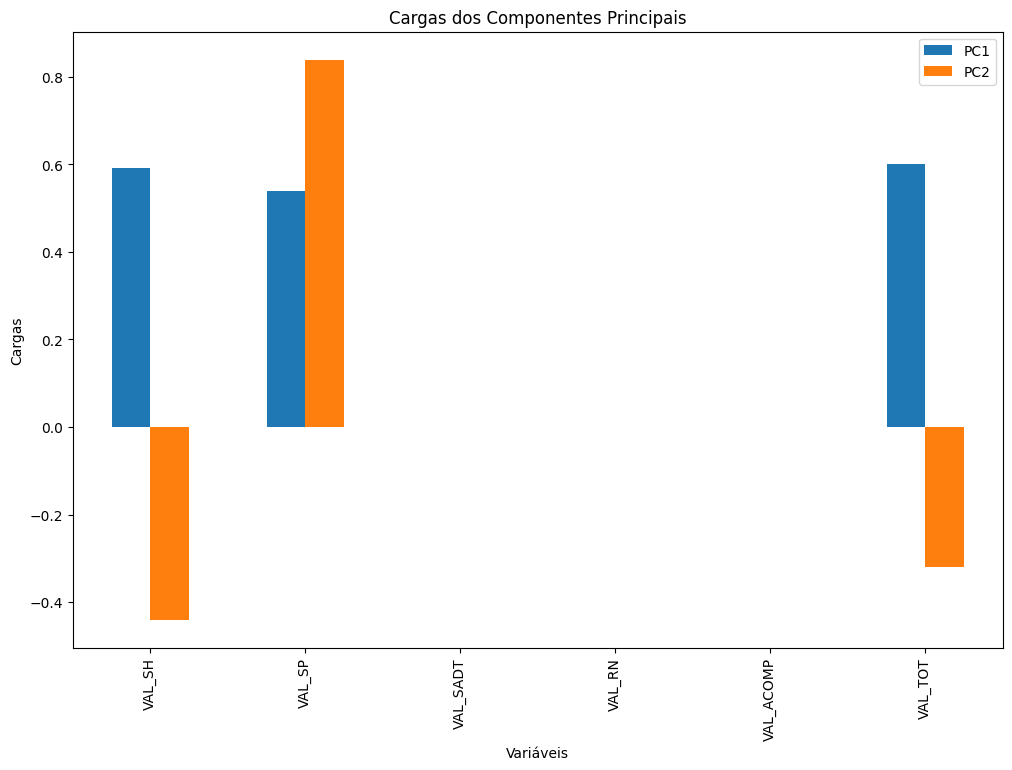

In [ ]:
# Plotar as cargas dos componentes principais
plt.figure(figsize=(10, 6))
cargas_pca.T.plot(kind='bar', figsize=(12, 8))
plt.title('Cargas dos Componentes Principais')
plt.xlabel('Variáveis')
plt.ylabel('Cargas')
plt.show()


A Análise de Componentes Principais (PCA) realizada sobre os dados do Sistema de Informações Hospitalares (SIH) revelou que as variáveis VAL_TOT, VAL_SH e VAL_SP são as mais importantes na explicação da variabilidade dos dados. O primeiro componente principal (PC1), que explica a maior parte da variância, é fortemente influenciado por VAL_TOT e VAL_SH, indicando que o custo total da internação e os serviços hospitalares são os principais fatores que direcionam as diferenças entre as internações. Já o segundo componente principal (PC2) destaca VAL_SP como uma variável crucial, mostrando que os serviços profissionais têm um papel significativo na variação residual. Essas descobertas sugerem que os custos totais e os serviços prestados são os principais determinantes das diferenças observadas nos dados de internação.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                VAL_TOT   No. Observations:                61128
Model:                            GLM   Df Residuals:                    61125
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.1637e+07
Date:                Sat, 10 Aug 2024   Deviance:                   4.2775e+07
Time:                        13:34:14   Pearson chi2:                 4.52e+07
No. Iterations:                    11   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7454      0.000      5e+04      0.0

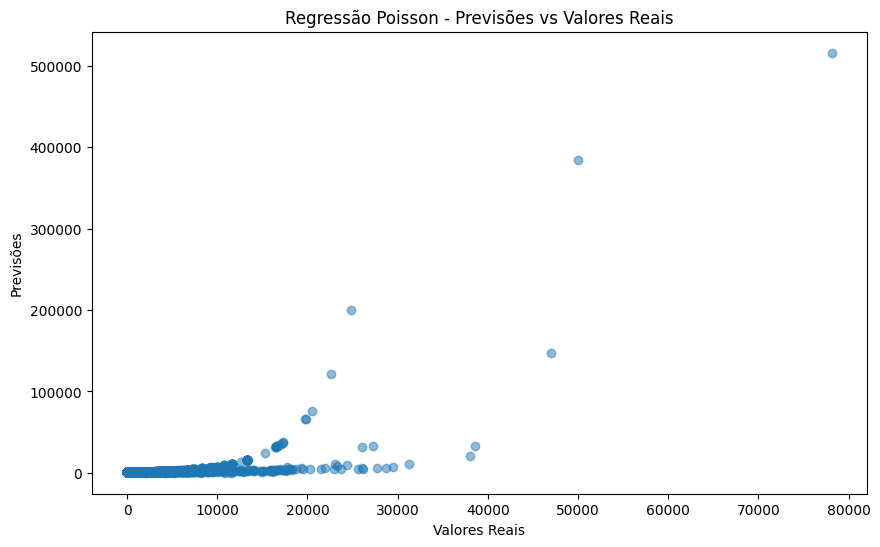

In [ ]:
# Regressão de Poisson para avaliar a mudança esperada na contagem de eventos
import statsmodels.api as sm

# Preparar os dados - Exemplo de uma variável de interesse como desfecho
# Suponha que a variável 'VAL_TOT' representa o número de eventos
X = bancosih[['VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN', 'VAL_ACOMP']]
y = bancosih['VAL_TOT']

# Adicionar constante ao modelo
X = sm.add_constant(X)

# Ajustar modelo de Regressão Poisson
modelo_poisson = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Sumário do modelo
print(modelo_poisson.summary())

# Obter previsões
previsoes_poisson = modelo_poisson.predict(X)

# Visualizar previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y, previsoes_poisson, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Regressão Poisson - Previsões vs Valores Reais')
plt.show()
